In [124]:
# ДЗ 2
# Зашумить изображение при помощи шума гаусса, постоянного шума.
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
# Выяснить, какой фильтр показал лучший результат фильтрации шума.
# Зашумить изображение 2 при помощи шума типа соль-перец.
# Исследовать, как влияет частота шума на качество работы морфологических операций открытие/закрытие.

In [125]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error

plt.set_cmap("gray")

<Figure size 640x480 with 0 Axes>

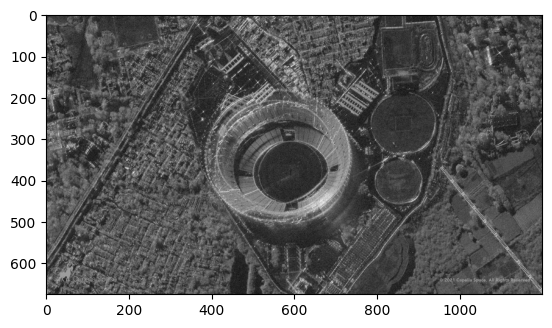

In [126]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray) 

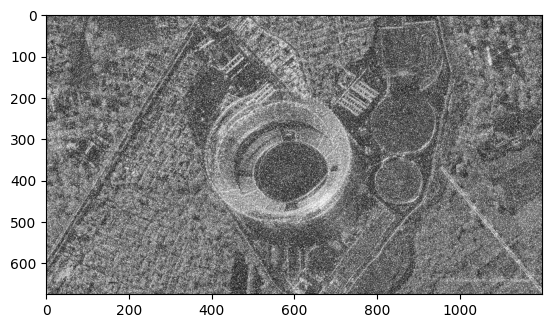

In [127]:
# Gaussian noise
noise_gauss = np.random.normal(0, 100, image_gray.shape)
noise_gauss[noise_gauss<0] = 0
noise_gauss = noise_gauss.astype(np.uint8)
image_noise_gauss = cv2.add(image_gray,noise_gauss,)
plt.imshow(image_noise_gauss)

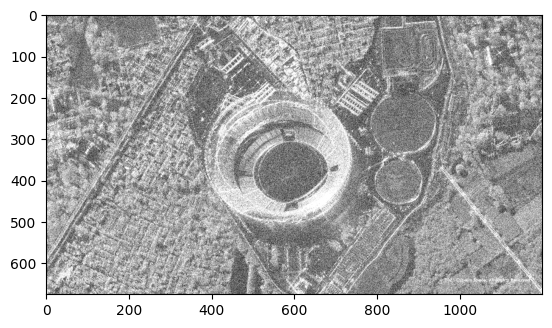

In [128]:
# Uniform noise
noise_uniform = np.random.uniform(50, 150, image_gray.shape).astype(np.uint8)
image_noise_uniform = cv2.add(image_gray,noise_uniform,)
plt.imshow(image_noise_uniform)

Text(0.5, 1.0, 'Uniform noise filtered 2')

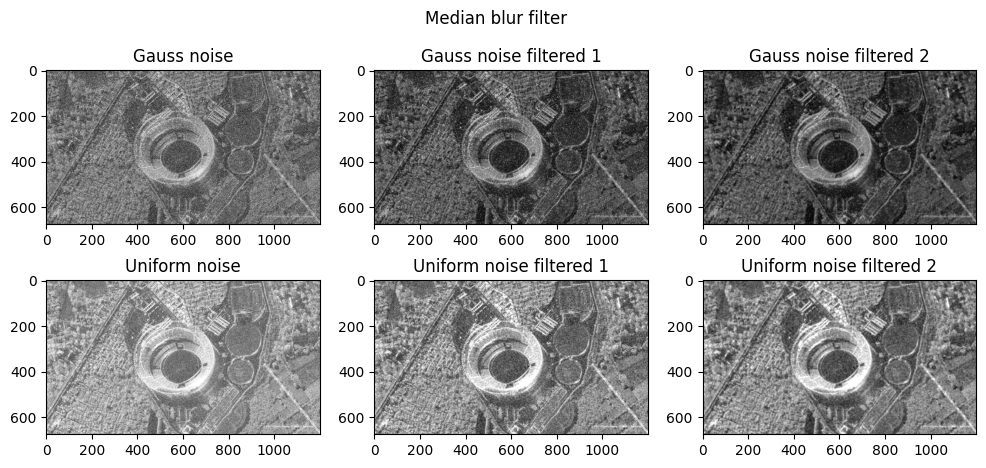

In [129]:
# median blur filter
mb_gauss_1 = cv2.medianBlur(image_noise_gauss, 3)
mb_gauss_2 = cv2.medianBlur(image_noise_gauss, 5)
mb_uniform_1 = cv2.medianBlur(image_noise_uniform, 3)
mb_uniform_2 = cv2.medianBlur(image_noise_uniform, 5)

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 5))
fig.suptitle('Median blur filter')
axes[0, 0].imshow(image_noise_gauss)
axes[0, 1].imshow(mb_gauss_1)
axes[0, 2].imshow(mb_gauss_2)
axes[1, 0].imshow(image_noise_uniform)
axes[1, 1].imshow(mb_uniform_1)
axes[1, 2].imshow(mb_uniform_2)
axes[0, 0].set_title("Gauss noise")
axes[0, 1].set_title("Gauss noise filtered 1")
axes[0, 2].set_title("Gauss noise filtered 2")
axes[1, 0].set_title("Uniform noise")
axes[1, 1].set_title("Uniform noise filtered 1")
axes[1, 2].set_title("Uniform noise filtered 2")

In [130]:
mb_gn_ssim_1, _ = structural_similarity(image_gray, mb_gauss_1, full=True)
mb_gn_mse_1 = mean_squared_error(image_gray, mb_gauss_1)
mb_gn_ssim_2, _ = structural_similarity(image_gray, mb_gauss_2, full=True)
mb_gn_mse_2 = mean_squared_error(image_gray, mb_gauss_2)
mb_un_ssim_1, _ = structural_similarity(image_gray, mb_uniform_1, full=True)
mb_un_mse_1 = mean_squared_error(image_gray, mb_uniform_1)
mb_un_ssim_2, _ = structural_similarity(image_gray, mb_uniform_2, full=True)
mb_un_mse_2 = mean_squared_error(image_gray, mb_uniform_2)

print("\tGauss filtered 1\tGauss filtered 2")
print(f"ssim:\t{mb_gn_ssim_1}\t{mb_gn_ssim_2}")
print(f"mse:\t{mb_gn_mse_1}\t{mb_gn_mse_2}\n")
print("\tUniform filtered 1\tUniform filtered 2")
print(f"ssim:\t{mb_un_ssim_1}\t{mb_un_ssim_2}")
print(f"mse:\t{mb_un_mse_1}\t{mb_un_mse_2}")

	Gauss filtered 1	Gauss filtered 2
ssim:	0.4392521919203685	0.4761141513594126
mse:	982.7129975308642	675.2166061728395

	Uniform filtered 1	Uniform filtered 2
ssim:	0.3943782852459881	0.3665930488286513
mse:	10142.4277654321	10113.977202469136


Text(0.5, 1.0, 'Uniform noise filtered 2')

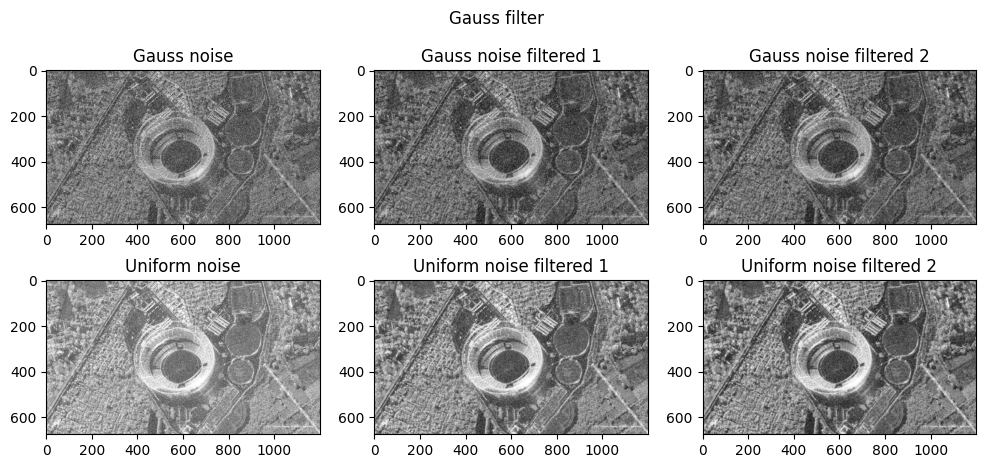

In [131]:
# gauss filter
gb_gauss_1 = cv2.GaussianBlur(image_noise_gauss, (3,3), 100)
gb_gauss_2 = cv2.GaussianBlur(image_noise_gauss, (5,5), 0)
gb_uniform_1 = cv2.GaussianBlur(image_noise_uniform, (3,3), 100)
gb_uniform_2 = cv2.GaussianBlur(image_noise_uniform, (5,5), 0)

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 5))
fig.suptitle('Gauss filter')
axes[0, 0].imshow(image_noise_gauss)
axes[0, 1].imshow(gb_gauss_1)
axes[0, 2].imshow(gb_gauss_2)
axes[1, 0].imshow(image_noise_uniform)
axes[1, 1].imshow(gb_uniform_1)
axes[1, 2].imshow(gb_uniform_2)
axes[0, 0].set_title("Gauss noise")
axes[0, 1].set_title("Gauss noise filtered 1")
axes[0, 2].set_title("Gauss noise filtered 2")
axes[1, 0].set_title("Uniform noise")
axes[1, 1].set_title("Uniform noise filtered 1")
axes[1, 2].set_title("Uniform noise filtered 2")

In [132]:
gb_gn_ssim_1, _ = structural_similarity(image_gray, gb_gauss_1, full=True)
gb_gn_mse_1 = mean_squared_error(image_gray, gb_gauss_1)
gb_gn_ssim_2, _ = structural_similarity(image_gray, gb_gauss_2, full=True)
gb_gn_mse_2 = mean_squared_error(image_gray, gb_gauss_2)
gb_un_ssim_1, _ = structural_similarity(image_gray, gb_uniform_1, full=True)
gb_un_mse_1 = mean_squared_error(image_gray, gb_uniform_1)
gb_un_ssim_2, _ = structural_similarity(image_gray, gb_uniform_2, full=True)
gb_un_mse_2 = mean_squared_error(image_gray, gb_uniform_2)

print("\tGauss filtered 1\tGauss filtered 2")
print(f"ssim:\t{gb_gn_ssim_1}\t{gb_gn_ssim_2}")
print(f"mse:\t{gb_gn_mse_1}\t{gb_gn_mse_2}\n")
print("\tUniform filtered 1\tUniform filtered 2")
print(f"ssim:\t{gb_un_ssim_1}\t{gb_un_ssim_2}")
print(f"mse:\t{gb_un_mse_1}\t{gb_un_mse_2}")

	Gauss filtered 1	Gauss filtered 2
ssim:	0.4488192513690775	0.4948024616128931
mse:	1764.3377716049383	1678.8533604938273

	Uniform filtered 1	Uniform filtered 2
ssim:	0.46931981259364275	0.4842623044605597
mse:	9927.623732098766	9910.99815925926


Text(0.5, 1.0, 'Uniform noise filtered 2')

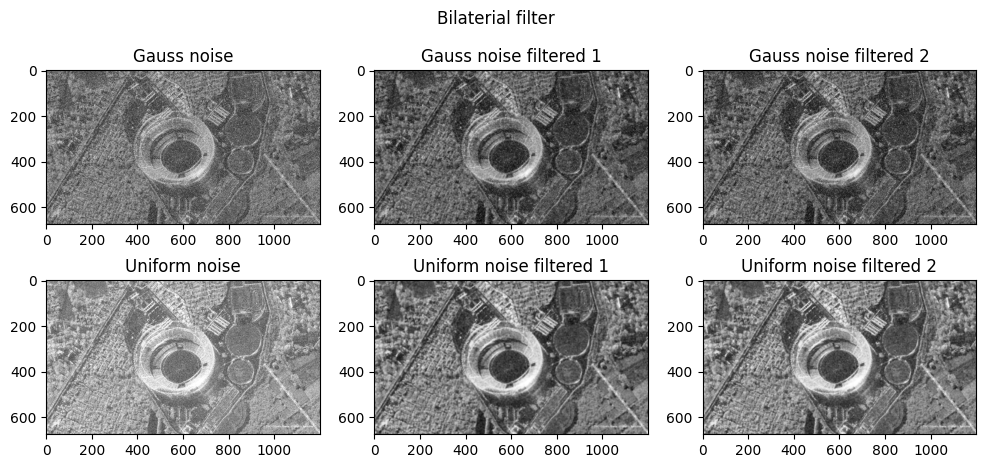

In [133]:
# bilaterial filter
bl_gauss_1 = cv2.bilateralFilter(image_noise_gauss,9,75,75)
bl_gauss_2 = cv2.bilateralFilter(image_noise_gauss,9,50,100)
bl_uniform_1 = cv2.bilateralFilter(image_noise_uniform,9,75,75)
bl_uniform_2 = cv2.bilateralFilter(image_noise_uniform,9,50,100)

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 5))
fig.suptitle('Bilaterial filter')
axes[0, 0].imshow(image_noise_gauss)
axes[0, 1].imshow(bl_gauss_1)
axes[0, 2].imshow(bl_gauss_2)
axes[1, 0].imshow(image_noise_uniform)
axes[1, 1].imshow(bl_uniform_1)
axes[1, 2].imshow(bl_uniform_2)
axes[0, 0].set_title("Gauss noise")
axes[0, 1].set_title("Gauss noise filtered 1")
axes[0, 2].set_title("Gauss noise filtered 2")
axes[1, 0].set_title("Uniform noise")
axes[1, 1].set_title("Uniform noise filtered 1")
axes[1, 2].set_title("Uniform noise filtered 2")

In [134]:
bl_gn_ssim_1, _ = structural_similarity(image_gray, bl_gauss_1, full=True)
bl_gn_mse_1 = mean_squared_error(image_gray, bl_gauss_1)
bl_gn_ssim_2, _ = structural_similarity(image_gray, bl_gauss_2, full=True)
bl_gn_mse_2 = mean_squared_error(image_gray, bl_gauss_2)
bl_un_ssim_1, _ = structural_similarity(image_gray, bl_uniform_1, full=True)
bl_un_mse_1 = mean_squared_error(image_gray, bl_uniform_1)
bl_un_ssim_2, _ = structural_similarity(image_gray, bl_uniform_2, full=True)
bl_un_mse_2 = mean_squared_error(image_gray, bl_uniform_2)

print("\tGauss filtered 1\tGauss filtered 2")
print(f"ssim:\t{bl_gn_ssim_1}\t{bl_gn_ssim_2}")
print(f"mse:\t{bl_gn_mse_1}\t{bl_gn_mse_2}\n")
print("\tUniform filtered 1\tUniform filtered 2")
print(f"ssim:\t{bl_un_ssim_1}\t{bl_un_ssim_2}")
print(f"mse:\t{bl_un_mse_1}\t{bl_un_mse_2}")

	Gauss filtered 1	Gauss filtered 2
ssim:	0.3285201879688591	0.2388030849138281
mse:	1720.4717679012347	2486.897986419753

	Uniform filtered 1	Uniform filtered 2
ssim:	0.4232029628899623	0.433844201022809
mse:	9970.850755555555	9985.436379012346


Text(0.5, 1.0, 'Uniform noise filtered 2')

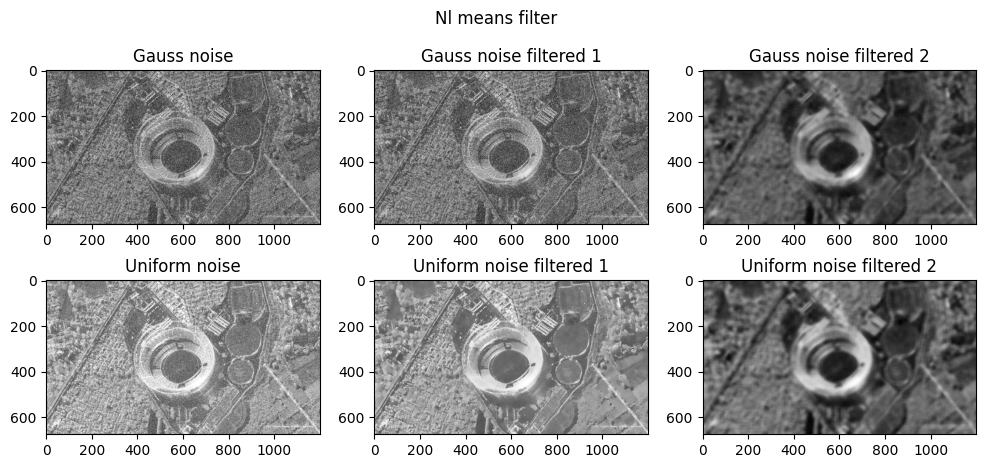

In [135]:
# nl means filter
nlm_gauss_1 = cv2.fastNlMeansDenoising(image_noise_gauss, h = 20)
nlm_gauss_2 = cv2.fastNlMeansDenoising(image_noise_gauss, h = 100)
nlm_uniform_1 = cv2.fastNlMeansDenoising(image_noise_uniform, h = 20)
nlm_uniform_2 = cv2.fastNlMeansDenoising(image_noise_uniform, h = 100)

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 5))
fig.suptitle('Nl means filter')
axes[0, 0].imshow(image_noise_gauss)
axes[0, 1].imshow(nlm_gauss_1)
axes[0, 2].imshow(nlm_gauss_2)
axes[1, 0].imshow(image_noise_uniform)
axes[1, 1].imshow(nlm_uniform_1)
axes[1, 2].imshow(nlm_uniform_2)
axes[0, 0].set_title("Gauss noise")
axes[0, 1].set_title("Gauss noise filtered 1")
axes[0, 2].set_title("Gauss noise filtered 2")
axes[1, 0].set_title("Uniform noise")
axes[1, 1].set_title("Uniform noise filtered 1")
axes[1, 2].set_title("Uniform noise filtered 2")

In [136]:
nlm_gn_ssim_1, _ = structural_similarity(image_gray, nlm_gauss_1, full=True)
nlm_gn_mse_1 = mean_squared_error(image_gray, nlm_gauss_1)
nlm_gn_ssim_2, _ = structural_similarity(image_gray, nlm_gauss_2, full=True)
nlm_gn_mse_2 = mean_squared_error(image_gray, nlm_gauss_2)
nlm_un_ssim_1, _ = structural_similarity(image_gray, nlm_uniform_1, full=True)
nlm_un_mse_1 = mean_squared_error(image_gray, nlm_uniform_1)
nlm_un_ssim_2, _ = structural_similarity(image_gray, nlm_uniform_2, full=True)
nlm_un_mse_2 = mean_squared_error(image_gray, nlm_uniform_2)

print("\tGauss filtered 1\tGauss filtered 2")
print(f"ssim:\t{nlm_gn_ssim_1}\t{nlm_gn_ssim_2}")
print(f"mse:\t{nlm_gn_mse_1}\t{nlm_gn_mse_2}\n")
print("\tUniform filtered 1\tUniform filtered 2")
print(f"ssim:\t{nlm_un_ssim_1}\t{nlm_un_ssim_2}")
print(f"mse:\t{nlm_un_mse_1}\t{nlm_un_mse_2}")

	Gauss filtered 1	Gauss filtered 2
ssim:	0.1948182394813945	0.27075243390067105
mse:	4033.316172839506	1812.0022086419754

	Uniform filtered 1	Uniform filtered 2
ssim:	0.43721716953623324	0.20104399881505639
mse:	9992.212520987654	10188.9469345679


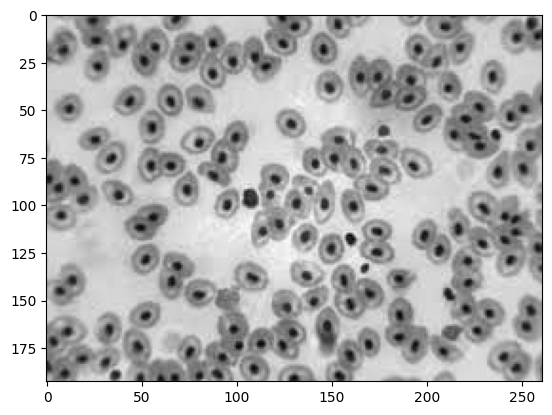

In [137]:
image = cv2.imread('./cells_2.jpg')
image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)

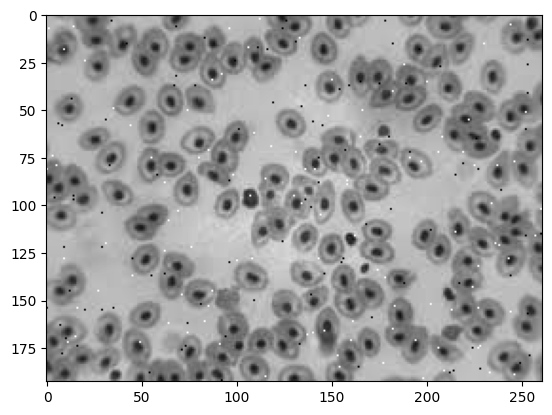

In [138]:
import copy
image_noise_salt_papper_1 = copy.deepcopy(image)
noise =  np.random.randint(0, 501, size = (image.shape[0], image.shape[1]), dtype=int)
zeros_pixel = np.where(noise == 0)
ones_pixel = np.where(noise == 500)
image_noise_salt_papper_1[zeros_pixel] = 0
image_noise_salt_papper_1[ones_pixel] = 255
plt.imshow(image_noise_salt_papper_1)

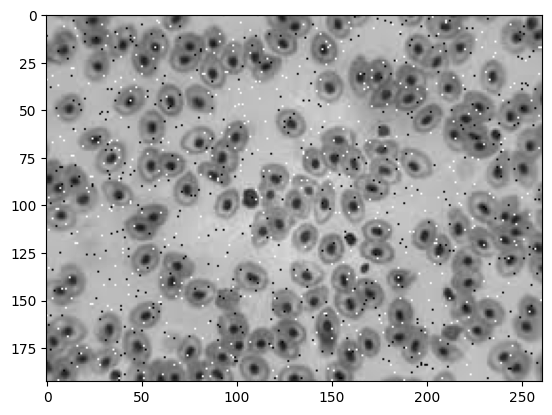

In [139]:
image_noise_salt_papper_2 = copy.deepcopy(image)
noise =  np.random.randint(0, 101, size = (image.shape[0], image.shape[1]), dtype=int)
zeros_pixel = np.where(noise == 0)
ones_pixel = np.where(noise == 100)
image_noise_salt_papper_2[zeros_pixel] = 0
image_noise_salt_papper_2[ones_pixel] = 255
plt.imshow(image_noise_salt_papper_2)

Text(0.5, 1.0, 'Opening 2')

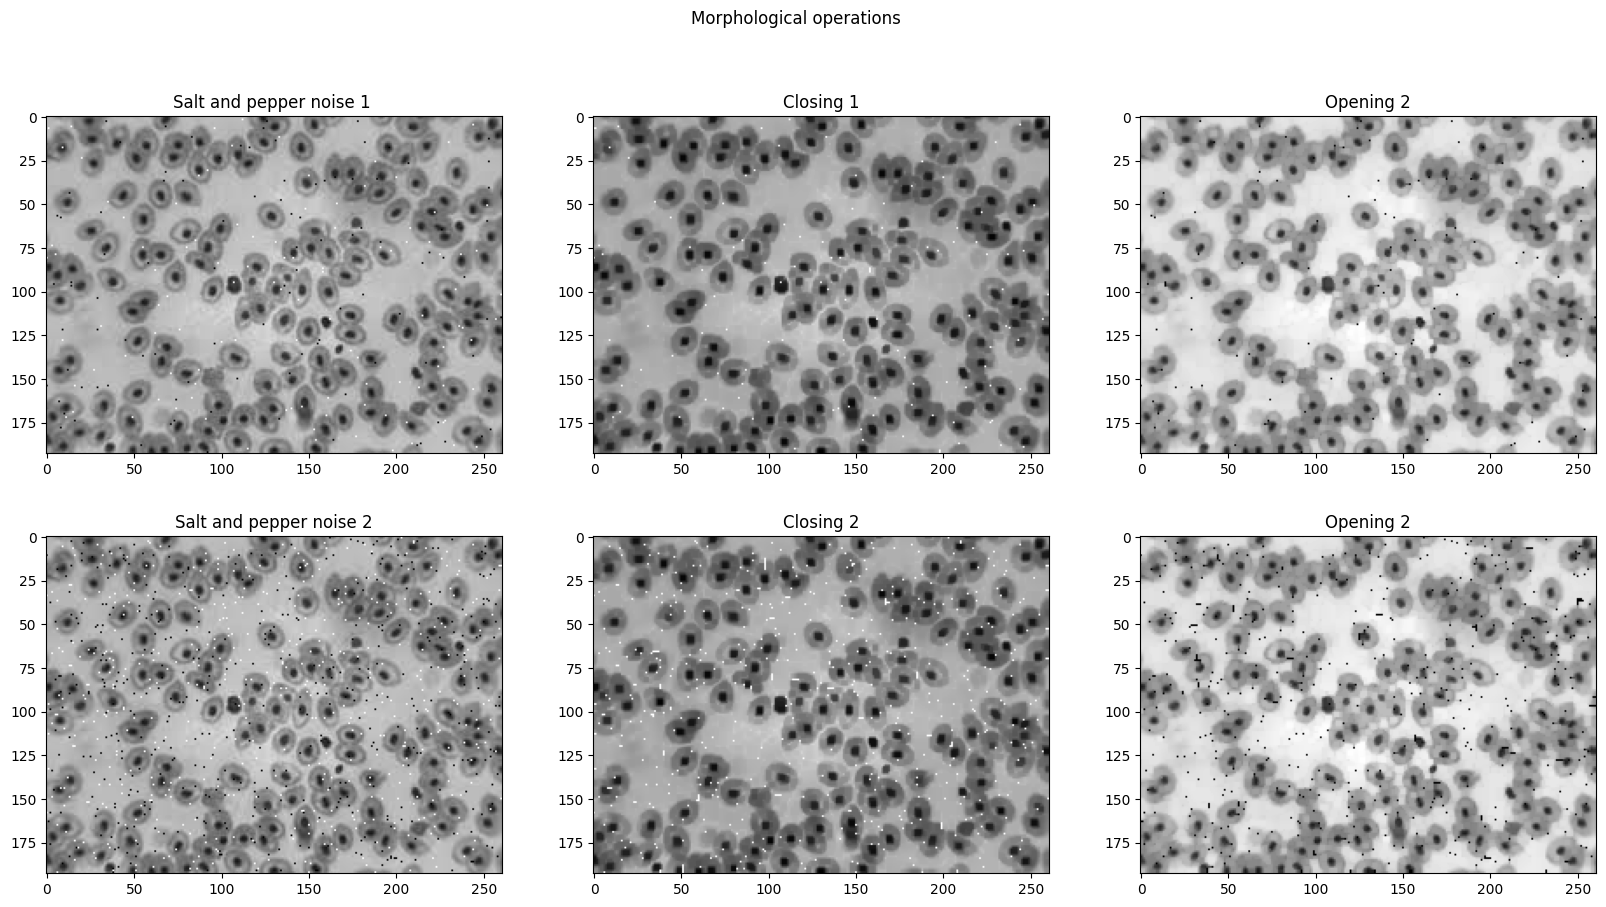

In [148]:
kernel = np.ones((3,3),np.uint8)
closing_1 = cv2.morphologyEx(image_noise_salt_papper_1, cv2.MORPH_CLOSE, kernel)
opening_1 = cv2.morphologyEx(image_noise_salt_papper_1, cv2.MORPH_OPEN, kernel)
closing_2 = cv2.morphologyEx(image_noise_salt_papper_2, cv2.MORPH_CLOSE, kernel)
opening_2= cv2.morphologyEx(image_noise_salt_papper_2, cv2.MORPH_OPEN, kernel)


fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
fig.suptitle('Morphological operations')
axes[0, 0].imshow(image_noise_salt_papper_1)
axes[0, 1].imshow(closing_1)
axes[0, 2].imshow(opening_1)
axes[1, 0].imshow(image_noise_salt_papper_2)
axes[1, 1].imshow(closing_2)
axes[1, 2].imshow(opening_2)
axes[0, 0].set_title("Salt and pepper noise 1 ")
axes[0, 1].set_title("Closing 1")
axes[0, 2].set_title("Opening 2")
axes[1, 0].set_title("Salt and pepper noise 2")
axes[1, 1].set_title("Closing 2")
axes[1, 2].set_title("Opening 2")